<a href="https://colab.research.google.com/github/sheetal-vartak/What-Drives-the-Price-of-a-Car/blob/main/prompt_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

---

[link text](https://)

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.



---



Following are specific purposes for which we could understand what influences the price of a car  
1. Pricing of cars: knowing what drives the price of a car can help car manufacturers decide on the right prices.

2. Car manufacture: Understand which car features matter to consumers the most.

3. Guide car buyers



### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

Looking at the data, following is what I have noticed :
1. There are many duplicates based on a specific set of columns.
2. There are NaN values in a number of rows which can be removed
3. The vehicle year should be instead converted into vehicle age
4. Remove outliers like certain manufacturers, price range and condition


### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [4]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker


In [5]:
from google.colab import drive
drive.mount('/content/drive')

#create the DataFrame utilizing Pandas
auto = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/vehicles.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
auto.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [7]:
#Investigate if there are any missing values
auto.isnull().sum()

,0
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


Let's look at the columns with NaN values.
1. 'model' has 5277 NaN values out of 426k entries i.e. 1.2%. We can remove those rows.
2. 'year' has 1205 NaN values. We can remove those rows
3. 'fuel' has 3013 NaN values. We will remove them
4. 'odometer' has '4400' NaN values. Remove them
5. 'title_status' has 8242 NaN values. Remove them
6. 'transmission' has 2556 NaN values. Remove them
7. 'manufacturer' has 17646 NaN values i.e. 4% of the data set. Remove them
8. 'condition' has 174k NaN values i.e. 40% of the data set. This is considerable. So we will go with filling in the NaN value with mode.
9. Same as above for 'cylinders'
10. Same as above for 'drive'
11. same as above for 'size'
12. Same as above for 'paint_color'
13. same as above for 'type'

In [8]:
#check how many rows are duplicates
#drop dups
duplicates = auto[auto.duplicated()]
print("Number of duplicate rows:", len(duplicates))

auto = auto.drop_duplicates(subset=['VIN','price', 'odometer','condition', 'type', 'size', 'drive', 'fuel','cylinders', 'year', 'manufacturer', 'model', 'transmission', 'state', 'paint_color'], keep='first')
print("Number of duplicate rows:", len(auto))
auto.shape

# We don't need the VIN column
auto_clean = auto.drop(columns = ["VIN"])

auto_clean = auto_clean.dropna(subset = ["model", "year", "fuel", "odometer", "title_status", "transmission", "manufacturer"])
auto_clean['condition'] = auto_clean['condition'].fillna(auto_clean['condition'].mode()[0])
auto_clean['cylinders'] = auto_clean['cylinders'].fillna(auto_clean['cylinders'].mode()[0])
auto_clean['drive'] = auto_clean['drive'].fillna(auto_clean['drive'].mode()[0])
auto_clean['size'] = auto_clean['size'].fillna(auto_clean['size'].mode()[0])
auto_clean['type'] = auto_clean['type'].fillna(auto_clean['type'].mode()[0])

# we can remove the rows with price = 0
auto_clean = auto_clean[auto_clean['price'] > 0]

#change the year to reflect the age of the vehicle
auto_clean['vehicle_age'] = 2025 - auto_clean['year']
auto_clean = auto_clean.drop(columns = ["year"])

auto_clean.shape


Number of duplicate rows: 0
Number of duplicate rows: 299454


(255973, 17)

Find the correlation between condition and price.

<Axes: xlabel='condition', ylabel='count'>

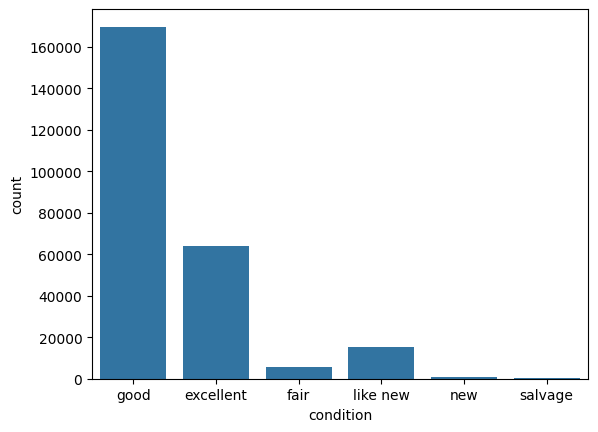

In [9]:
sns.countplot(data=auto_clean, x="condition")

Looks like most used cars in the this data set are in good condition. Now, lets remove the condition "salvage" and "new" since its so low.

In [10]:
#count rows with condition = "salvage" or "new"
auto_clean[(auto_clean['condition'] == 'salvage') | (auto_clean['condition'] == 'new')].shape

(1363, 17)

In [11]:
#drop rows with condition = "salvage" or "new"
auto_clean = auto_clean[(auto_clean['condition'] != 'salvage') & (auto_clean['condition'] != 'new')]
auto_clean.shape

(254610, 17)

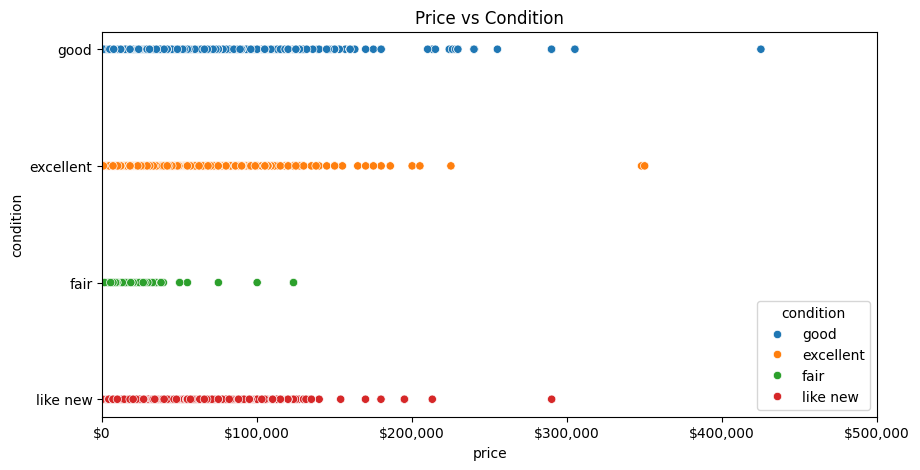

In [12]:
plt.figure(figsize=(10, 5))
plt.title('Price vs Condition')
sns.scatterplot(auto_clean, x='price', y='condition', hue='condition')
# Format y-axis to show full price values (e.g., no scientific notation)
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # No decimal, with $ sign
plt.xlim(0, 500000)
plt.show()

In [13]:
#looks like anything over $250k is an outlier. Let's remove those
auto_clean = auto_clean[auto_clean['price'] < 250000]
auto_clean.shape

(254570, 17)

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


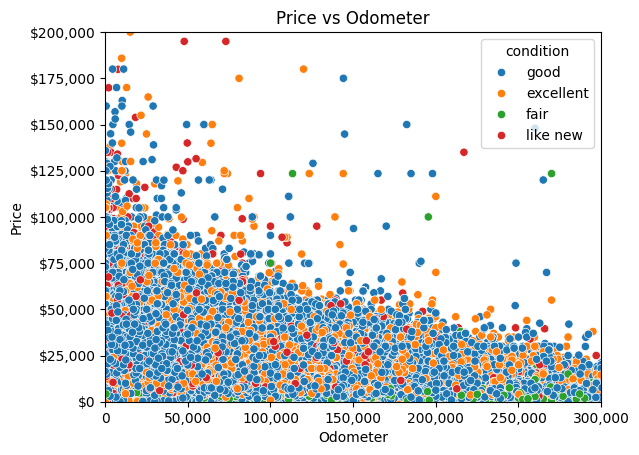

In [14]:
sns.scatterplot(auto_clean, x='odometer', y='price', hue='condition')
plt.xlabel('Odometer')
plt.ylabel('Price')
plt.title('Price vs Odometer')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # No decimal, with $ sign
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # No decimal, with $ sign
plt.xlim(0, 300000)
plt.ylim(0, 200000)
plt.show()

/tmp/ipython-input-2979203293.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df.groupby('odometer_bin')['price'].mean().reset_index()
/tmp/ipython-input-2979203293.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_avg, x='odometer_bin', y='price', palette='Blues_d')


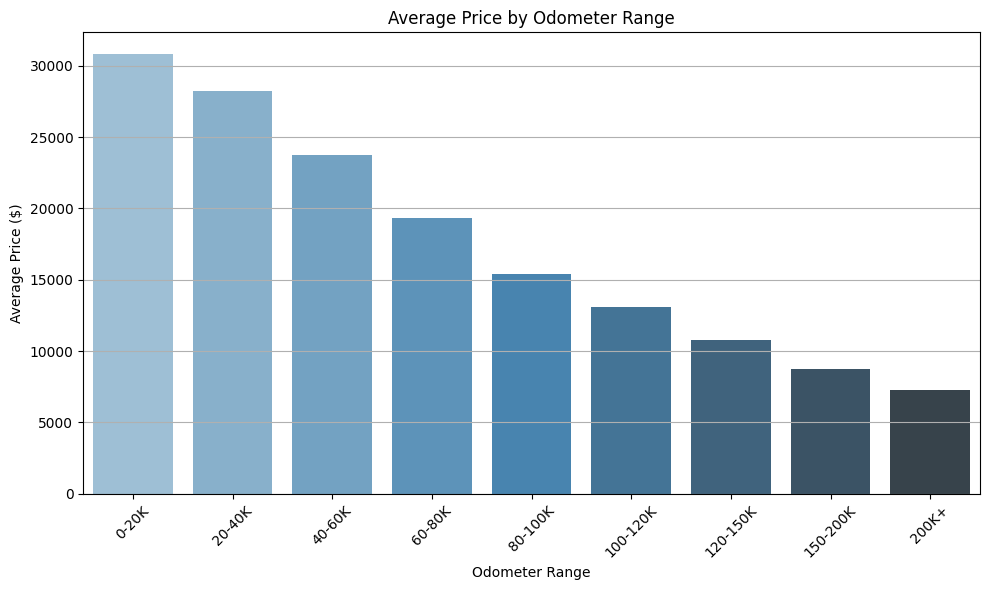

In [15]:

df = auto_clean.dropna(subset=['price', 'odometer'])

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 150000, 200000, 300000]
labels = ['0-20K', '20-40K', '40-60K', '60-80K', '80-100K',
          '100-120K', '120-150K', '150-200K', '200K+']

df['odometer_bin'] = pd.cut(df['odometer'], bins=bins, labels=labels, include_lowest=True)
bin_avg = df.groupby('odometer_bin')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_avg, x='odometer_bin', y='price', palette='Blues_d')

plt.title('Average Price by Odometer Range')
plt.xlabel('Odometer Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


As the mileage increases, the price decreases.
The better the condition, higher the price of the car.:

/tmp/ipython-input-581509635.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = df.groupby('age_bin')['price'].mean().reset_index()
/tmp/ipython-input-581509635.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bin_avg, x='age_bin', y='price', palette='Blues_d')


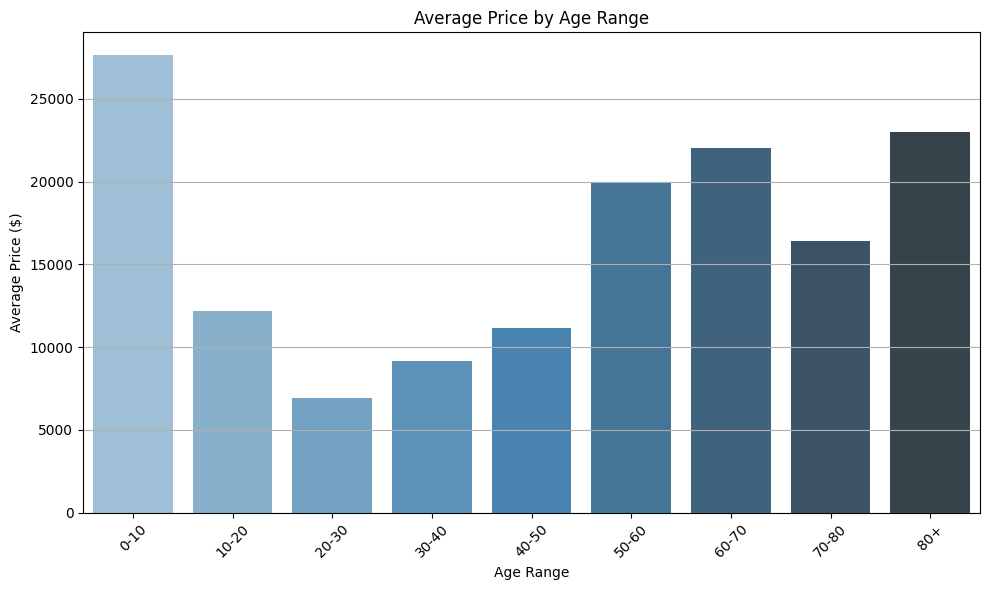

In [16]:
df = auto_clean.dropna(subset=['price', 'vehicle_age'])

bins = [0, 10,20,30,40,50,60,70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50',
          '50-60', '60-70', '70-80', '80+']

df['age_bin'] = pd.cut(df['vehicle_age'], bins=bins, labels=labels, include_lowest=True)
bin_avg = df.groupby('age_bin')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_avg, x='age_bin', y='price', palette='Blues_d')

plt.title('Average Price by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Price ($)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Count by Manufacturer'}, xlabel='manufacturer', ylabel='count'>

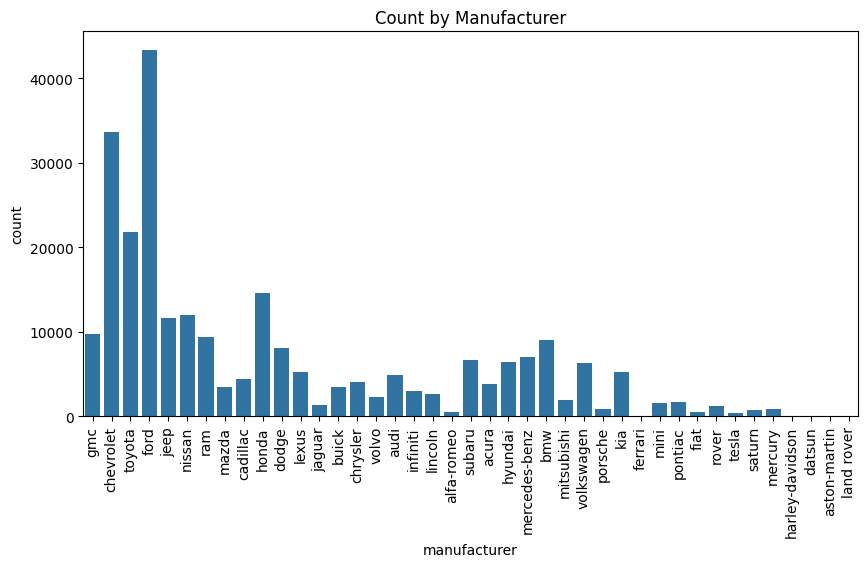

In [17]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=90)
plt.title('Count by Manufacturer')
sns.countplot(data=auto_clean, x="manufacturer")

In [18]:
#how many rows have manufacturer as aston-martin, land rover, datsun, alfa-romeo, fiat, tesla or mercury
auto_clean[(auto_clean['manufacturer'] == 'aston-martin') | (auto_clean['manufacturer'] == 'land rover') | (auto_clean['manufacturer'] == 'datsun') | (auto_clean['manufacturer'] == 'tesla') | (auto_clean['manufacturer'] == 'mercury') | (auto_clean['manufacturer'] == 'alfa-romeo') | (auto_clean['manufacturer'] == 'fiat')].shape


(2475, 17)

We can remove those rows.

In [19]:
#remove rows with manufacturer as aston-martin, land rover, datsun, mercury, fiat, alfa-romeo, tesla
auto_clean = auto_clean[(auto_clean['manufacturer'] != 'aston-martin') & (auto_clean['manufacturer'] != 'land rover') & (auto_clean['manufacturer'] != 'datsun') & (auto_clean['manufacturer'] != 'mercury') & (auto_clean['manufacturer'] != 'fiat') & (auto_clean['manufacturer'] != 'alfa-romeo') & (auto_clean['manufacturer'] != 'tesla')]
auto_clean.shape


(252095, 17)

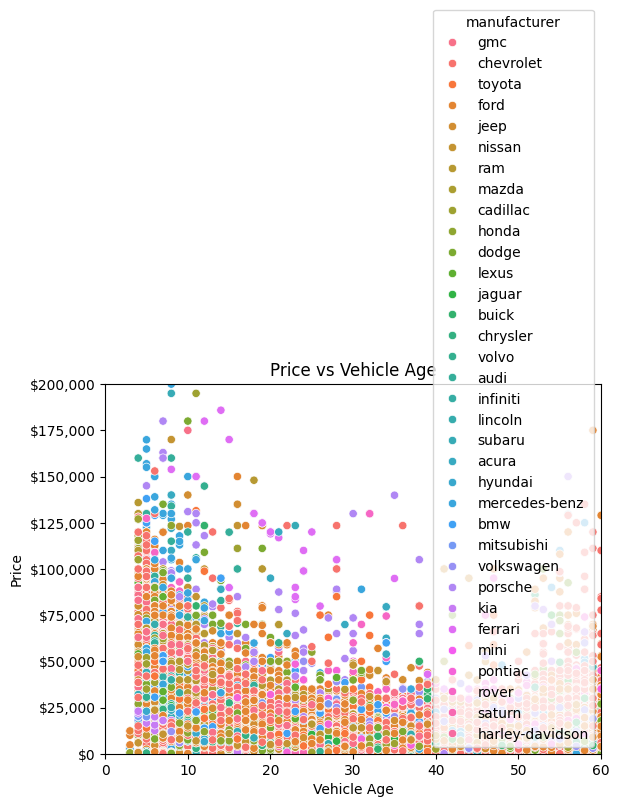

In [20]:
sns.scatterplot(auto_clean, x='vehicle_age', y='price', hue = 'manufacturer')
plt.xlabel('Vehicle Age')
plt.ylabel('Price')
plt.title('Price vs Vehicle Age')
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x:,.0f}'))  # No decimal, with $ sign
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))  # No decimal, with $ sign
plt.xlim(0, 60)
plt.ylim(0, 200000)
plt.show()

In [21]:
# reduce the data set to only contain columns drive,transmission,condition,cylinders,fuel,title_status,price,vehicle_age,odometer,manufacturer,size
auto_clean = auto_clean[['drive', 'transmission', 'condition', 'cylinders', 'fuel', 'title_status', 'price', 'vehicle_age', 'odometer', 'manufacturer', 'size']]


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

Approach:
1. Run PCA on the standardized data set.
2. First, I will build a LinearRegression model with just 1 feature i.e. condition and see what the loss looks like
2. Next, I'll build a set of features and repeat the above.
3. Will perhaps increase this set to more features and calculate the MSE
4. Compare the MSE across the above 3 models to evaluate which one is better.

In [22]:
#use One Hot Encoder to convert condition, drive, transmission,cylinders,fuel,title_status, transmission, size, manufacturer into numerical column
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
auto_clean_ohe = pd.get_dummies(auto_clean, columns=['condition', 'drive', 'transmission', 'cylinders', 'fuel', 'title_status', 'transmission', 'size', 'manufacturer'])
auto_clean_ohe.shape


(252095, 73)

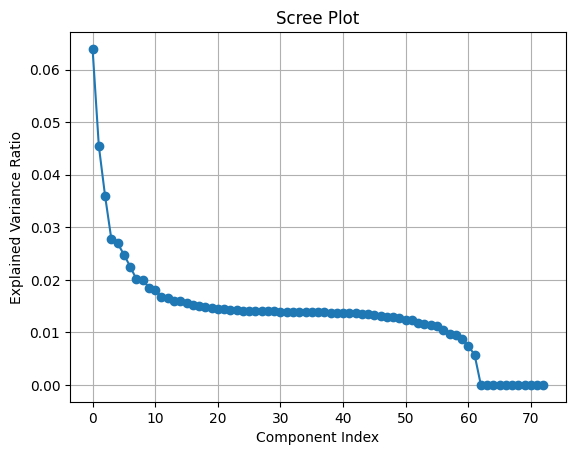

In [23]:
#run PCA on auto_clean_ohe
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(auto_clean_ohe)
pca = PCA()
pca.fit(scaled_data)

# Get cumulative explained variance
#cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot it
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

I am not able to generate the elbow for some reason

In [24]:
# Simple Linear Regression model based on vehicle_age
features = auto_clean[['vehicle_age']]
target = auto_clean['price']
from sklearn import linear_model
f = linear_model.LinearRegression(fit_intercept=False)
f.fit(features, target)
#f.score(features, target)

LinearRegression(fit_intercept=False)

In [25]:
f.predict([[15]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([10350.70838868])

In [26]:
f.predict([[5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3450.23612956])

The model does not predict the right price for the vehicle age entered. Clearly because the price does not just depend on the vehicle age. Other features need to be analyzed. The relationship is non-linear so linear regression does not work.

In [27]:
#create PolynomialFeatures Transformer & PCA Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

pipeline_model = Pipeline([
    ('pca', PCA(n_components=0.9)),
    ('quad_features', PolynomialFeatures(degree = 2, include_bias=False)),
     ('quad_model', LinearRegression())
])
X = auto_clean[['vehicle_age']]
y = auto_clean['price']
pipeline_model.fit(X, y)
mse = float(mean_squared_error(y, pipeline_model.predict(X)))

print("mean squared error =", mse)

pipeline_model.predict([[15]])

mean squared error = 144931424.23036152


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([14698.68120631])

In [28]:
pipeline_model.predict([[5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([29536.45776411])

ok. So just by leveraging the PolynomialFeatures for the non-linear relationship between vehicle age and price, we were able to get a much better model.
Next, let's look at the same pipeline model but with condition and manufacturer.

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


categorical_features = ['condition', 'manufacturer']
numeric_cols = ['vehicle_age', 'odometer']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_cols)

    ],
    remainder='passthrough'  # keep numeric features as-is
)
X_train, X_test, y1_train, y1_test = train_test_split(auto_clean[['vehicle_age', 'odometer', 'condition', 'manufacturer']], auto_clean['price'], random_state = 32, test_size=.3)

pipeline_model = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=10)),
    ('quad_features', PolynomialFeatures(degree = 2, include_bias=False)),
     ('quad_model', LinearRegression())
])
pipeline_model.fit(X_train, y1_train)
train_mse = float(mean_squared_error(y1_train, pipeline_model.predict(X_train)))
test_mse = float(mean_squared_error(y1_test, pipeline_model.predict(X_test)))
print("train mean squared error =", train_mse)
print("test mean squared error =", test_mse)


data = pd.DataFrame({
    'vehicle_age': [15],
    'condition': ['good'],
    'odometer': [100000],
    'manufacturer': ['toyota']
})
predicted_price = pipeline_model.predict(data)
print(f"Predicted price: ${predicted_price[0]:,.2f}")


train mean squared error = 116627027.05609132
test mean squared error = 120632634.75140308
Predicted price: $14,977.56


In [31]:
data = pd.DataFrame({
    'vehicle_age': [5],
    'condition': ['good'],
    'odometer': [100000],
    'manufacturer': ['toyota']
})
predicted_price = pipeline_model.predict(data)
print(f"Predicted price: ${predicted_price[0]:,.2f}")


Predicted price: $26,854.43


Cross Validation
1. divide up the data set into train and test data sets
2. determine MSE and which model has the least MSE


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

train_mses = []
test_mses = []

categorical_features = ['condition', 'manufacturer']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # keep numeric features as-is
)

X_train, X_test, y1_train, y1_test = train_test_split(auto_clean[['vehicle_age', 'odometer', 'condition', 'manufacturer']], auto_clean['price'], random_state = 32, test_size=.3)


for i in range(1, 4):
  pipeline_model = Pipeline([
      ('preprocessor', preprocessor),
      ('quad_features', PolynomialFeatures(degree = i, include_bias=False)),
      ('quad_model', LinearRegression())
  ])

  pipeline_model.fit(X_train, y1_train)
  train_preds = pipeline_model.predict(X_train)
  test_preds = pipeline_model.predict(X_test)
  train_mses.append(mean_squared_error(y1_train, train_preds))
  test_mses.append(mean_squared_error(y1_test, test_preds))

best_model_complexity = test_mses.index(min(test_mses)) + 1
print(f"Best model complexity: {best_model_complexity}")



Best model complexity: 1


In [34]:
#what are the columns in auto_clean
auto_clean.columns


Index(['drive', 'transmission', 'condition', 'cylinders', 'fuel',
       'title_status', 'price', 'vehicle_age', 'odometer', 'manufacturer',
       'size'],
      dtype='object')

In [35]:
#let's use Lasso Regression
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

train_mses = []
test_mses = []


categorical_features = ['condition', 'manufacturer', 'title_status', "transmission", "size"]
numeric_cols = ['vehicle_age', 'odometer']

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_cols)

    ],
    remainder='passthrough'  # keep numeric features as-is
)
X_train, X_test, y1_train, y1_test = train_test_split(auto_clean[['vehicle_age', 'odometer', 'condition', 'manufacturer', 'title_status', "transmission", "size"]], auto_clean['price'], random_state = 32, test_size=.3)

pipeline_model = Pipeline([
    ('preprocessor', preprocessor),
   # ('pca', PCA(n_components=10)),
    ('quad_features', PolynomialFeatures(degree = 2, include_bias=False)),
    ('lasso', Lasso(random_state = 42))
])

pipeline_model.fit(X_train, y1_train)
train_mse = float(mean_squared_error(y1_train, pipeline_model.predict(X_train)))
test_mse = float(mean_squared_error(y1_test, pipeline_model.predict(X_test)))
print("train mean squared error =", train_mse)
print("test mean squared error =", test_mse)

data = pd.DataFrame({
    'vehicle_age': [15],
    'condition': ['good'],
    'odometer': [100000],
    'manufacturer': ['toyota'],
    'size': ['mid-size'],
    'title_status': ['clean'],
    'transmission': ['automatic']
})
predicted_price = pipeline_model.predict(data)
print(f"Predicted price: ${predicted_price[0]:,.2f}")



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:656: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 757700947380.6641, tolerance: 3655778929.8153963
  model = cd_fast.sparse_enet_coordinate_descent(


train mean squared error = 102989874.48906939
test mean squared error = 110003039.01224038
Predicted price: $13,039.46


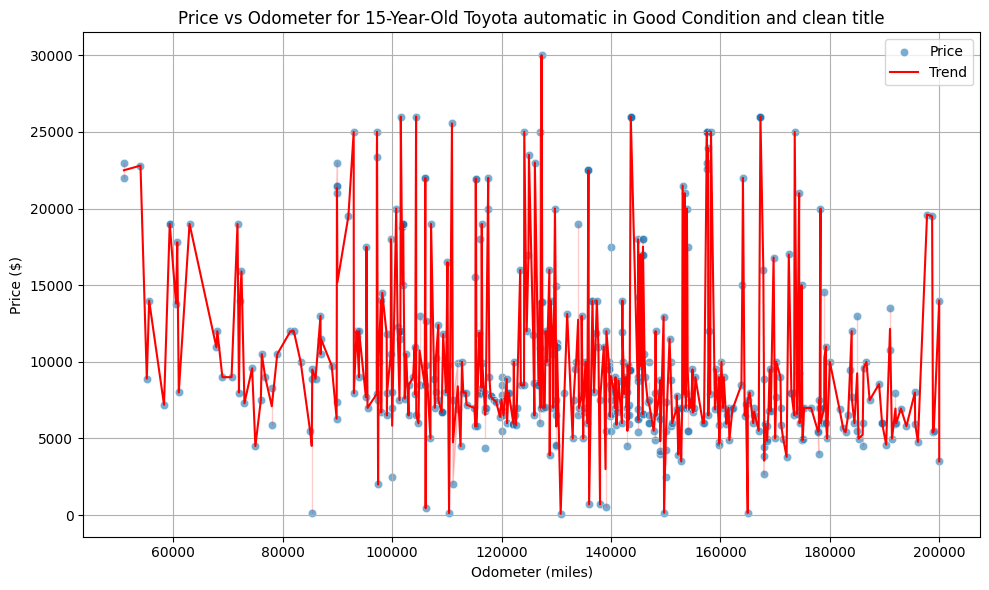

In [43]:
#plot to check if the following features are enough to predict the price
df = auto_clean
# Filter data
filtered = df[
    (df['condition'].str.lower() == 'good') &
    (df['manufacturer'].str.lower() == 'toyota') &
    (df['vehicle_age'] == 15) &
    (df['odometer'].between(50000, 200000) &
    (df['title_status'].str.lower() == 'clean') &
    (df['transmission'].str.lower() == 'automatic')
  )]

# Sort for clean line plot (optional)
filtered = filtered.sort_values(by='odometer')

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered, x='odometer', y='price', alpha=0.6, label='Price')
sns.lineplot(data=filtered, x='odometer', y='price', color='red', label='Trend')

plt.title('Price vs Odometer for 15-Year-Old Toyota automatic in Good Condition and clean title')
plt.xlabel('Odometer (miles)')
plt.ylabel('Price ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We can tell from this plot that the price depends on many features.

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

The last model with Lasso in the mix was definitely a better model. The MSE was lower than everything I have tried so far.
I eliminated a few columns to build this model. I would like to revisit that decision and perhaps use those eliminated columns to build the model to see if it makes a difference.






I was able to derive the following based on various plots :
1. As the mileage increases, the price decreases.
2. People tend to buy cars in good condition.
3. The better the condition, higher the price of the car.
4. I don’t quite agree with the data when it comes to age. I believe the price should decrease for older cars but I am not able to see that in my plot.
5. Manufacturer does matter for the sale of the car.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

**Used Car Pricing Insights & Recommendations**

**By Sheetal Vartak**

Date: September 2025

**Project Overview**

Objective to help car dealership to better understand what drives the price of used vehicles using data-driven analysis.

[Used Car dataset](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI-R2/module11/practical_application_II_starter.zip) was used for this analysis.


**Key features that influence car price**

I was able to derive the following based on various plots :

1.   As the mileage increases, the price decreases.
2.   People tend to buy cars in good condition.
3.   The better the condition, higher the price of the car.
4.   I don’t quite agree with the data when it comes to age. I believe the price should decrease for older cars but I am not able to see that in my plot.
5.   Manufacturer does matter for the sale of the car.


**Build a model to predict the price**

The Lasso model seems to predict the price the best compared to all the models I built.

**Recommendations on car inventory**

1. Cars by Japanese manufacturers seem to age well. Customers prefer these manufacturers.
2. Good/Excellent condition seems to sell better.
3. Less mileage will help sell better.
4. Car age matters for sales.


